In [1]:
import swasputils

In [2]:
objects = swasputils.load_objects(min_period=0)
zoo_lookup = swasputils.load_lookup()
zoo_subjects = swasputils.load_zoo_subjects()
classifications = swasputils.load_classifications()
manual_classifications = swasputils.load_manual_classifications()

C:\Users\anm83\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
swasputils.join_swasp_ids(objects)
objects = swasputils.merge_zoo_ids(objects, zoo_lookup)
objects = swasputils.merge_zoo_subjects(objects, zoo_subjects)
objects = swasputils.merge_classifications(objects, classifications)
objects = swasputils.merge_manual_classifications(objects, manual_classifications)
objects = swasputils.decode_zoo_locations(objects)
objects = swasputils.decode_manual_annotations(objects)
len(objects.index)

C:\Users\anm83\Documents\Code\superwasp-long-periods\swasputils.py:108: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  lambda s: yaml.load(s)['0']
C:\Users\anm83\Documents\Code\superwasp-long-periods\swasputils.py:115: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(s)[0]['value']


1576846

In [4]:
objects['Sigma * Chi Squared'] = objects['Sigma'] * objects['Chi Squared']

In [5]:
classified = objects[objects['Classification'].notna()]
len(classified.index)

572094

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E0A449370>]],
      dtype=object)

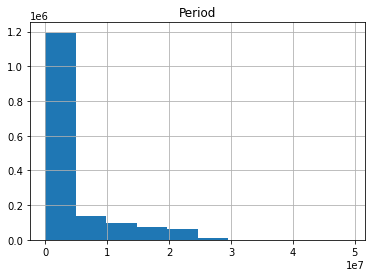

In [6]:
objects.hist(column='Period')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E0AB728E0>]],
      dtype=object)

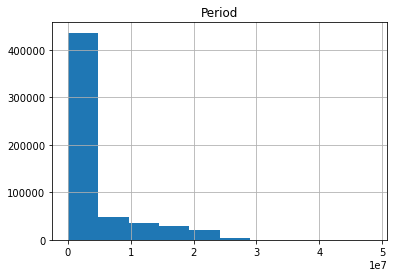

In [7]:
classified.hist(column='Period')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E1A8C78B0>]],
      dtype=object)

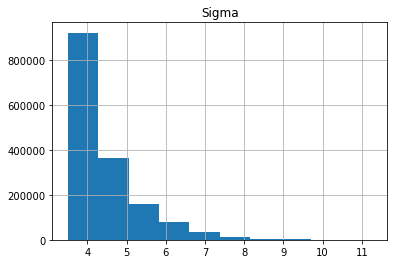

In [8]:
objects.hist(column='Sigma')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E1A91CCD0>]],
      dtype=object)

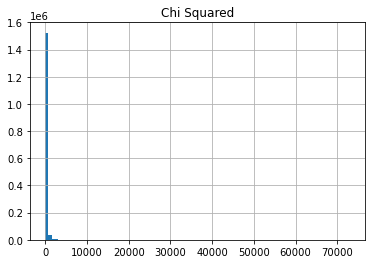

In [9]:
objects.hist(column='Chi Squared', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E5078CD00>]],
      dtype=object)

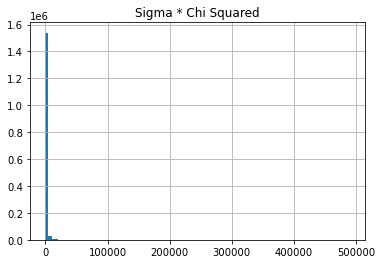

In [10]:
objects.hist(column='Sigma * Chi Squared', bins=100)

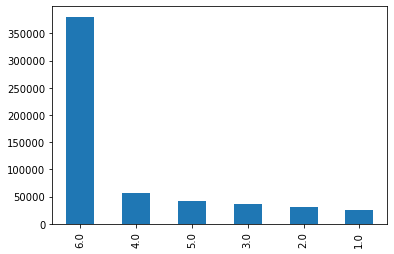

In [11]:
classified['Classification'].value_counts().plot(kind='bar')

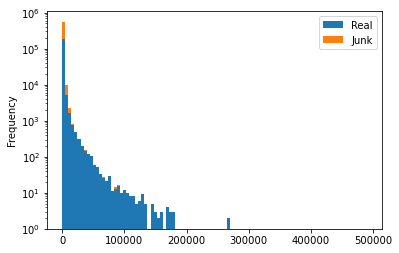

In [12]:
import pandas
pandas.DataFrame({
    'Real': classified[classified['Classification'] != 6.0]['Sigma * Chi Squared'],
    'Junk': classified[classified['Classification'] == 6.0]['Sigma * Chi Squared'],
}).plot.hist(bins=100, stacked=True, log=True)